In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np
from dataloader import dataloader, dataset_for_classification
from adaboost import MulticlassClassifier

In [2]:
train_data, test_data = dataloader("./FDDB-folds/", "./originalPics/")

/Users/jiangfulin/Desktop/College/CS376_Computer_Vision/CV_face_detection_project/dataloader.py:95: RuntimeWarning: divide by zero encountered in double_scalars
  t = np.arctan(b*(1/np.tan(phi))/a)


2306
2306
539
(418, 450, 3)
265.1632266114674 194.6700793885326 133.1346399502098 27.8935720497902


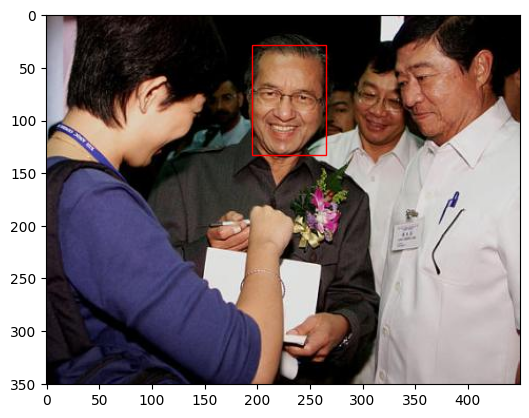

In [3]:
print(len(train_data["img"]))
print(len(train_data["faces"]))
print(len(test_data['img']))
print(train_data["img"][0].shape)
fig, ax = plt.subplots()
ax.imshow(train_data["img"][5])
max_x, min_x, max_y, min_y = train_data["faces"][5][0, :]
print(max_x, min_x, max_y, min_y)
width = max_x - min_x
height = max_y - min_y
rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [4]:
int(min_x), int(max_x), int(min_y), int(max_y)

(195, 314, 46, 220)

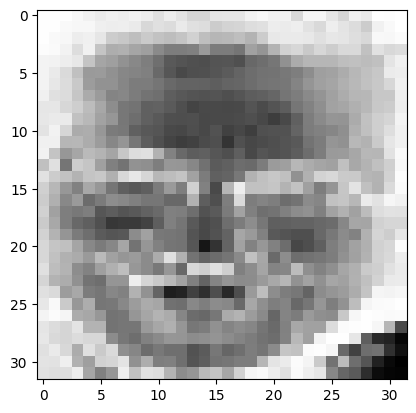

In [4]:
im = cv2.cvtColor(train_data['img'][5],cv2.COLOR_BGR2GRAY)
resized_im = cv2.resize(im[int(min_y):int(max_y), int(min_x):int(max_x)], (32,32))
plt.imshow(resized_im, cmap='Greys')

In [5]:
train_classification, test_classification = dataset_for_classification(train_data, test_data, 5)

11530
513
24
0


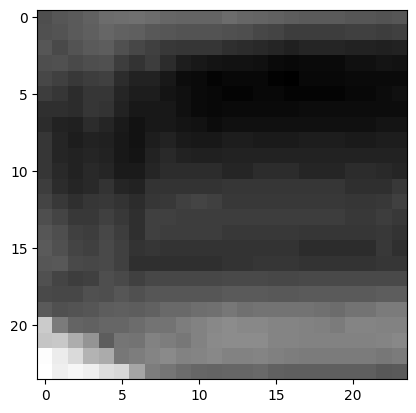

In [6]:
print(len(train_classification['img']))
print(train_classification['labels'].count(1))
print(train_classification['labels'].index(1))
print(train_classification['labels'][9])
plt.imshow(train_classification['img'][9], cmap='Greys')

In [8]:
adaboost_classifier = MulticlassClassifier([1], [24,24])
adaboost_classifier.fit(np.array(train_classification['img']), np.array(train_classification['labels']), 30)

100%|██████████| 30/30 [01:39<00:00,  3.33s/it]


In [10]:
acc, _ = adaboost_classifier.evaluate(np.array(test_classification['img']),np.array(test_classification['labels']))
print("Multiclass Classifier accuracy:", acc)

Multiclass Classifier accuracy: 0.9651205936920223
